### **Problem Statement**
Find publicly available data for key factors that influence US home prices nationally. Then, build a data science model that explains how these factors impacted home prices over the last 20 years.

 ## <b> Data Description </b>
### <b> The dataset contains information like DATE , p_saving_rate,	mortgage_rate ,	IPI_Cement,	PPI_Cement	permit	PPI_Concrete	population	new_private_house	emratio	...	GDP	home_ow_rate	house_st	total_emp_cons	labor_percent	all_Const_Emp	monthly_supply	unemployed_rate	MSPUS	which tales abouth the target variable or dependant variable
we have to prove that the key factors influencing home prices in the United States over the past two decades. By leveraging publicly available data and advanced data science techniques, our goal is to build a comprehensive
model that sheds light on the intricate relationship between various factors and home prices.**
                                        
   
                                                                 

In [260]:
# Importing the Liabraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


## **Data Preparation**

In [261]:
# Reading the dataset
Dataset= pd.read_csv("/Dataset_1.csv")

## **Inspecting Dataset**

In [262]:
# reading the top rows of dataset
Dataset.head()

,DATE,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target
0,01-01-1987,9.4,9.2040,123.7373,100.1,1690,4.703204,241857,7974.739004,61.0,...,4722.156,63.9,1774,5007,65.4,722.3,6.0,6.6,97900,63.735
1,01-02-1987,8.2,9.0825,123.1670,100.8,1689,4.703204,242005,7502.244305,61.1,...,4722.156,63.9,1784,5038,65.5,724.2,6.2,6.6,97900,64.135
2,01-03-1987,8.1,9.0350,122.5706,101.2,1704,4.703204,242166,7106.570176,61.2,...,4722.156,63.9,1726,5039,65.5,727.9,6.0,6.6,97900,64.470
3,01-04-1987,4.1,9.8325,123.5345,100.8,1601,4.703204,242338,7316.773819,61.3,...,4806.160,63.9,1614,5053,65.4,728.1,6.0,6.3,103400,64.973
4,01-05-1987,7.8,10.5960,123.8454,101.2,1500,4.697749,242516,7203.844501,61.6,...,4806.160,63.9,1628,5080,65.7,727.6,6.7,6.3,103400,65.547


In [263]:
# Reading the last 5 rows of dataset
Dataset.tail()

,DATE,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target
434,01-03-2023,5.2,6.5440,93.3392,326.838,1437,5.811222,334753,6267.106393,60.4,...,26813.601,66.0,1380,7890,62.6,931.6,8.1,3.5,429000,297.316
435,01-04-2023,5.2,6.3425,92.2793,327.097,1417,5.821432,334880,5711.801065,60.4,...,27063.012,65.9,1348,7901,62.6,928.1,7.6,3.4,418500,301.469
436,01-05-2023,5.3,6.4250,97.6334,329.026,1496,5.821432,335013,6297.113648,60.3,...,27063.012,65.9,1583,7926,62.6,927.8,7.2,3.7,418500,305.427
437,01-06-2023,4.9,6.7140,97.0416,328.710,1441,5.821432,335163,6087.608141,60.3,...,27063.012,65.9,1418,7955,62.6,929.5,7.5,3.6,418500,308.307
438,01-07-2023,4.1,6.8400,94.5577,331.181,1443,5.821432,335329,5311.264970,60.4,...,27623.543,66.0,1451,7967,62.6,922.6,7.0,3.5,431000,310.162


In [264]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   DATE                  439 non-null    object 
 1   p_saving_rate         439 non-null    float64
 2   mortgage_rate         439 non-null    float64
 3   IPI_Cement            439 non-null    float64
 4   PPI_Cement            439 non-null    float64
 5   permit                439 non-null    int64  
 6   PPI_Concrete          439 non-null    float64
 7   population            439 non-null    int64  
 8   new_private_house     439 non-null    float64
 9   emratio               439 non-null    float64
 10  income                439 non-null    float64
 11  new_private_hw_under  439 non-null    float64
 12  GDP                   439 non-null    float64
 13  home_ow_rate          439 non-null    float64
 14  house_st              439 non-null    int64  
 15  total_emp_cons        4

In [265]:
# getting information like mean,median,mode etc..
Dataset.describe()

,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,income,...,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,6.148633,6.315856,119.565531,176.834228,1355.164009,5.155698,293349.423690,5206.608788,61.368052,11171.951708,...,13236.389663,65.777221,1337.020501,6288.307517,65.113440,742.157631,5.876993,5.747153,219945.558087,141.151487
std,2.075691,2.172124,23.911004,57.243653,390.759196,0.272078,28737.180981,1685.524304,2.011510,5197.803116,...,5902.255151,1.744104,379.076753,959.538073,1.786754,123.747671,1.675367,1.576956,90045.171678,60.304741
min,1.400000,2.684000,66.350800,100.100000,513.000000,4.697749,241857.000000,1685.483171,55.025000,3820.200000,...,4722.156000,63.100000,478.000000,4570.000000,60.100000,542.600000,3.300000,3.400000,97900.000000,63.735000
25%,4.900000,4.316250,101.180200,129.200000,1089.500000,4.958640,268602.000000,4145.299396,59.750000,6539.100000,...,7868.468000,64.100000,1103.000000,5424.500000,63.100000,633.150000,4.500000,4.600000,138000.000000,81.733000
50%,6.100000,6.262000,116.904800,171.800000,1381.000000,5.101085,295359.000000,5306.412981,61.900000,10464.100000,...,12922.656000,65.500000,1377.000000,6402.000000,66.000000,734.300000,5.600000,5.400000,219000.000000,141.048000
75%,7.450000,7.838000,139.426100,210.050000,1624.000000,5.337538,319331.500000,6357.205695,62.900000,14724.800000,...,17518.508000,67.400000,1582.500000,7092.000000,66.500000,826.250000,6.800000,6.600000,281000.000000,178.937000
max,11.275000,11.260000,192.032200,331.181000,2263.000000,5.821432,335329.000000,10017.121100,64.700000,24471.800000,...,27623.543000,69.400000,2273.000000,7967.000000,67.300000,1022.000000,10.250000,9.600000,479500.000000,310.162000


In [266]:


# Check for NaN values
missing_values = Dataset.isnull().sum()
print(missing_values)

# Drop rows with NaN values
data_without_nan = Dataset.dropna()

# Check for remaining NaN values
missing_values_after_drop = data_without_nan.isnull().sum()
print(missing_values_after_drop)

DATE                    0
p_saving_rate           0
mortgage_rate           0
IPI_Cement              0
PPI_Cement              0
permit                  0
PPI_Concrete            0
population              0
new_private_house       0
emratio                 0
income                  0
new_private_hw_under    0
GDP                     0
home_ow_rate            0
house_st                0
total_emp_cons          0
labor_percent           0
all_Const_Emp           0
monthly_supply          0
unemployed_rate         0
MSPUS                   0
target                  0
dtype: int64
DATE                    0
p_saving_rate           0
mortgage_rate           0
IPI_Cement              0
PPI_Cement              0
permit                  0
PPI_Concrete            0
population              0
new_private_house       0
emratio                 0
income                  0
new_private_hw_under    0
GDP                     0
home_ow_rate            0
house_st                0
total_emp_cons          0

In [267]:
#Check all the coloumns present in our dataset
Dataset.columns

Index(['DATE', 'p_saving_rate', 'mortgage_rate', 'IPI_Cement', 'PPI_Cement',
       'permit', 'PPI_Concrete', 'population', 'new_private_house', 'emratio',
       'income', 'new_private_hw_under', 'GDP', 'home_ow_rate', 'house_st',
       'total_emp_cons', 'labor_percent', 'all_Const_Emp', 'monthly_supply',
       'unemployed_rate', 'MSPUS', 'target'],
      dtype='object')

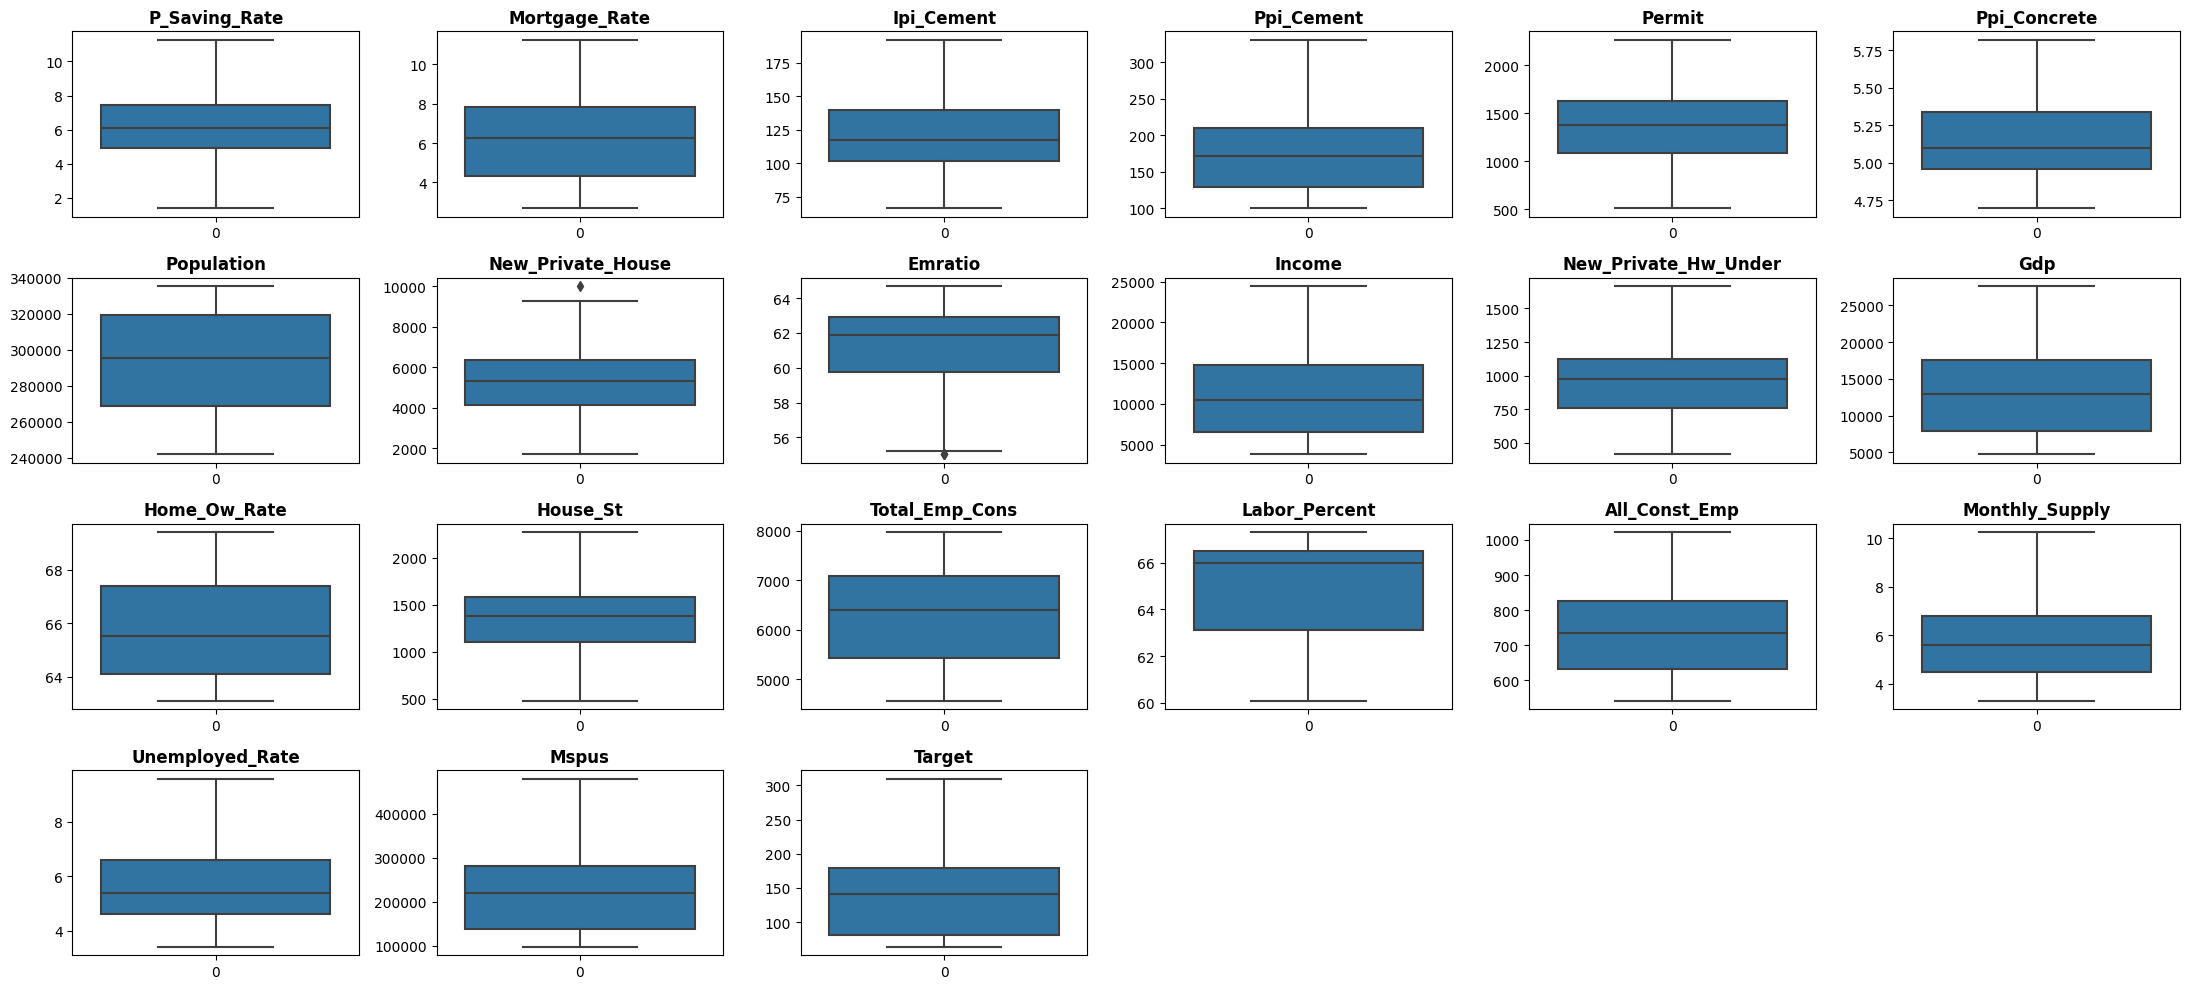

In [268]:
# Visualization is the easiest way to have an inference about the overall data and the outliers.
plt.figure(figsize=(22,10))
for n,column in enumerate(Dataset.describe().columns):
  plt.subplot(4,6,n+1)
  sns.boxplot(Dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**We have outliers in few features:**

- p_saving_rate
- PPI_Concrete
- new_private_house
- emratio
- new_private_hw_under
- monthly_supply
- unemployed_rate

In [269]:
# function to remove outliers from the p_saving_rate (PPI_Concretenew_private_houseemrationew_,private_hw_,undermonthly_supply unemployed_rate)
def remove_outliers(df, col_names):
    for col_name in col_names:
        q1 = df[col_name].quantile(0.25)
        q3 = df[col_name].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col_name] > lower_bound) & (df[col_name] < upper_bound)]
    return df

# Example usage
df =Dataset
cols_to_remove_outliers = ['p_saving_rate', 'PPI_Concrete', 'new_private_house', 'emratio', 'new_private_hw_under', 'monthly_supply', 'unemployed_rate']
df = remove_outliers(df, cols_to_remove_outliers)




In [270]:
#checking duplicates
len(Dataset[Dataset.duplicated()])

0

In [271]:
Dataset.head()

,DATE,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target
0,01-01-1987,9.4,9.2040,123.7373,100.1,1690,4.703204,241857,7974.739004,61.0,...,4722.156,63.9,1774,5007,65.4,722.3,6.0,6.6,97900,63.735
1,01-02-1987,8.2,9.0825,123.1670,100.8,1689,4.703204,242005,7502.244305,61.1,...,4722.156,63.9,1784,5038,65.5,724.2,6.2,6.6,97900,64.135
2,01-03-1987,8.1,9.0350,122.5706,101.2,1704,4.703204,242166,7106.570176,61.2,...,4722.156,63.9,1726,5039,65.5,727.9,6.0,6.6,97900,64.470
3,01-04-1987,4.1,9.8325,123.5345,100.8,1601,4.703204,242338,7316.773819,61.3,...,4806.160,63.9,1614,5053,65.4,728.1,6.0,6.3,103400,64.973
4,01-05-1987,7.8,10.5960,123.8454,101.2,1500,4.697749,242516,7203.844501,61.6,...,4806.160,63.9,1628,5080,65.7,727.6,6.7,6.3,103400,65.547


## **Exploratory Data analysis**

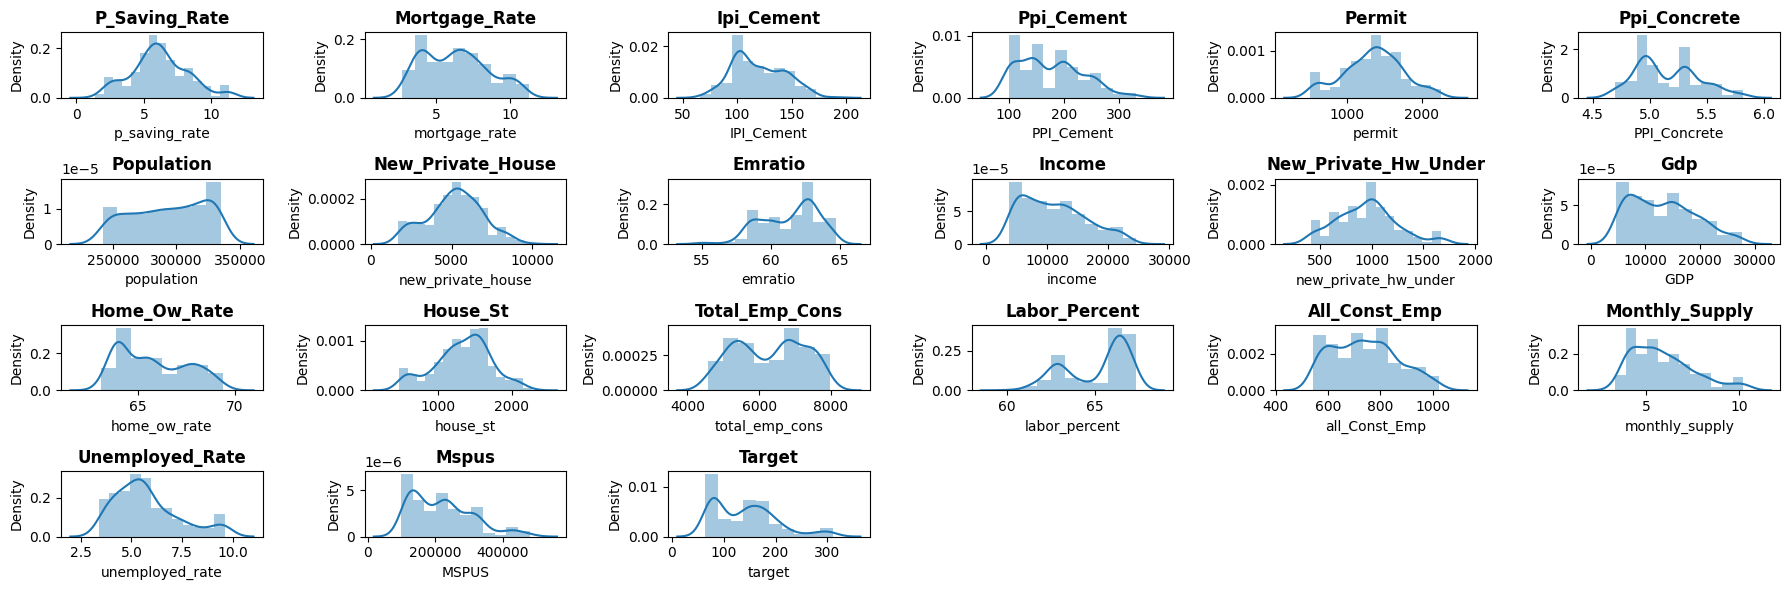

In [272]:
# Plotting the distplots for each  variable
plt.figure(figsize=(18,6))
for n,column in enumerate(Dataset.describe().columns):
  plt.subplot(4,6,n+1)
  sns.distplot(Dataset[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [273]:
Dataset.head()

,DATE,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,GDP,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target
0,01-01-1987,9.4,9.2040,123.7373,100.1,1690,4.703204,241857,7974.739004,61.0,...,4722.156,63.9,1774,5007,65.4,722.3,6.0,6.6,97900,63.735
1,01-02-1987,8.2,9.0825,123.1670,100.8,1689,4.703204,242005,7502.244305,61.1,...,4722.156,63.9,1784,5038,65.5,724.2,6.2,6.6,97900,64.135
2,01-03-1987,8.1,9.0350,122.5706,101.2,1704,4.703204,242166,7106.570176,61.2,...,4722.156,63.9,1726,5039,65.5,727.9,6.0,6.6,97900,64.470
3,01-04-1987,4.1,9.8325,123.5345,100.8,1601,4.703204,242338,7316.773819,61.3,...,4806.160,63.9,1614,5053,65.4,728.1,6.0,6.3,103400,64.973
4,01-05-1987,7.8,10.5960,123.8454,101.2,1500,4.697749,242516,7203.844501,61.6,...,4806.160,63.9,1628,5080,65.7,727.6,6.7,6.3,103400,65.547


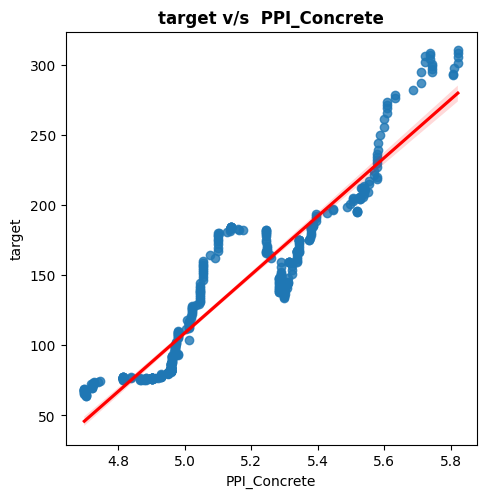

In [274]:
# Checking Linearity
plt.figure(figsize=(22,28))
plt.subplot(6,5 , n+1)
sns.regplot(data = Dataset, x ='PPI_Concrete' , y ='target',line_kws={"color": "red"})
plt.title(f'target v/s  PPI_Concrete',weight='bold')
plt.tight_layout()

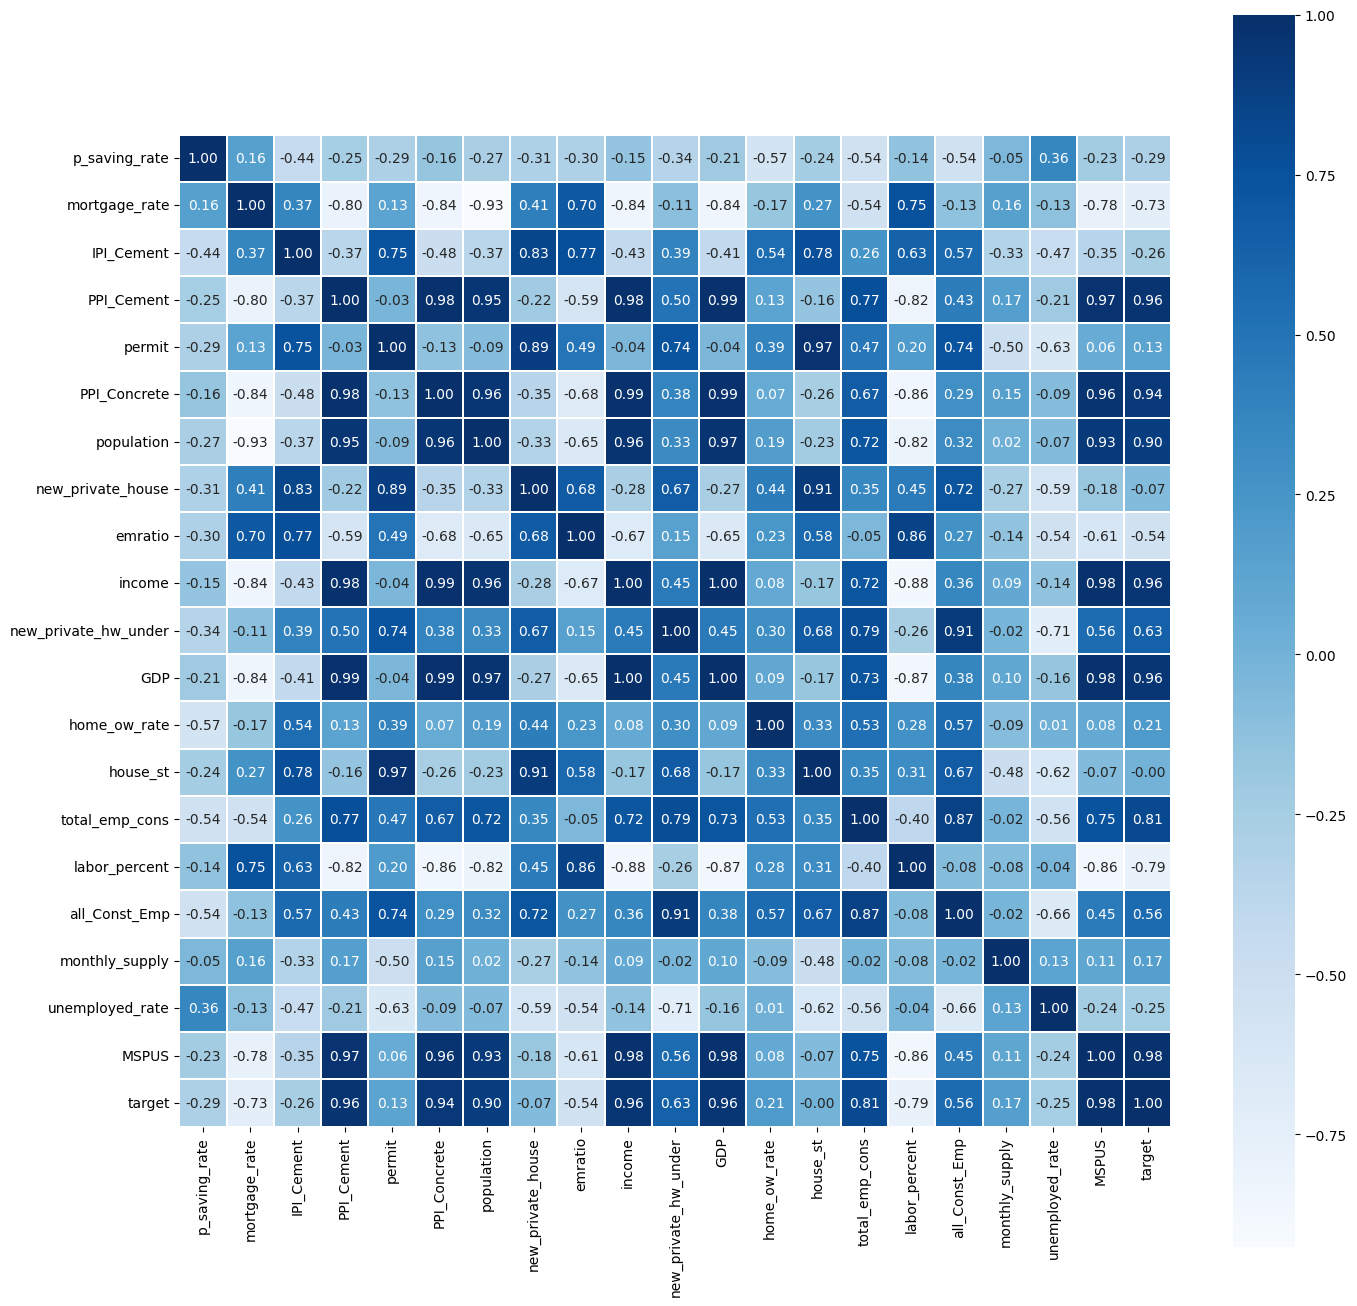

In [275]:
#Correlation with each catagory to other catagory by using heat map
fig, axes = plt.subplots(figsize=(16,16))
sns.heatmap(Dataset.corr(), ax=axes, annot=True, cmap=plt.cm.Blues ,linewidths=0.1, fmt='.2f', square=True)
plt.show()

## **Feature Engineering**

In [276]:
#checking correlation between the independant and dependant variable
corr_matrix= Dataset.corr()
corr_matrix['target'].sort_values(ascending=False)

target                  1.000000
MSPUS                   0.980144
PPI_Cement              0.964074
GDP                     0.960633
income                  0.955608
PPI_Concrete            0.939072
population              0.896974
total_emp_cons          0.812130
new_private_hw_under    0.634935
all_Const_Emp           0.560479
home_ow_rate            0.207294
monthly_supply          0.169504
permit                  0.127189
house_st               -0.001742
new_private_house      -0.068468
unemployed_rate        -0.249211
IPI_Cement             -0.260807
p_saving_rate          -0.286001
emratio                -0.538776
mortgage_rate          -0.730709
labor_percent          -0.788313
Name: target, dtype: float64

In [277]:
# Example of creating a new feature: year-on-year change in p_saving_rate
Dataset['p_saving_rate_change'] = Dataset['p_saving_rate'] - Dataset['p_saving_rate'].shift(1)

# Example of feature scaling: StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(Dataset[['p_saving_rate', 'mortgage_rate']])

# Example of correlation analysis: Pearson correlation
import scipy.stats as stats

correlation_matrix = Dataset.corr()
print(correlation_matrix['target'])

p_saving_rate          -0.286001
mortgage_rate          -0.730709
IPI_Cement             -0.260807
PPI_Cement              0.964074
permit                  0.127189
PPI_Concrete            0.939072
population              0.896974
new_private_house      -0.068468
emratio                -0.538776
income                  0.955608
new_private_hw_under    0.634935
GDP                     0.960633
home_ow_rate            0.207294
house_st               -0.001742
total_emp_cons          0.812130
labor_percent          -0.788313
all_Const_Emp           0.560479
monthly_supply          0.169504
unemployed_rate        -0.249211
MSPUS                   0.980144
target                  1.000000
p_saving_rate_change   -0.013014
Name: target, dtype: float64


In [278]:
### Data splitting and Scaling
dependend_variable =Dataset.target
independend_variable = Dataset.drop(columns=['DATE', 'target'], axis=1)

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables.

In [279]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE

In [280]:
# #spliting dataset into training and test set
training_df,testing_df = train_test_split(Dataset,train_size = 0.7, test_size = 0.3,random_state=42)

In [281]:
# #spliting dataset into training and test set
x_train = training_df.drop(['target','DATE'],axis=1)
y_train = training_df['target']
x_test  = testing_df.drop(['target','DATE'],axis=1)
y_test  = testing_df['target']

In [282]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

In [283]:
from sklearn.feature_selection import RFE
regressor = LinearRegression()
rfe       = RFE(regressor,n_features_to_select=13)
rfe.fit(x_train, y_train)
y_predd = rfe.predict(x_train)

In [284]:
final = x_train.columns[rfe.support_]
final

Index(['p_saving_rate', 'mortgage_rate', 'IPI_Cement', 'PPI_Cement',
       'PPI_Concrete', 'emratio', 'new_private_hw_under', 'home_ow_rate',
       'labor_percent', 'all_Const_Emp', 'monthly_supply', 'unemployed_rate',
       'p_saving_rate_change'],
      dtype='object')

In [285]:
rfe_x_train = x_train[final]

In [286]:
import statsmodels.api as lm
rfe_x_train = lm.add_constant(rfe_x_train)
sm          = lm.OLS(y_train,rfe_x_train).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2090.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          3.99e-280
Time:                        13:33:08   Log-Likelihood:                -979.34
No. Observations:                 307   AIC:                             1987.
Df Residuals:                     293   BIC:                             2039.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -601.9349 

In [287]:
rfe_x_train.drop(['const'],axis=1, inplace=True)

In [288]:
#checking VIF
calc_vif(rfe_x_train)

,variables,VIF
0,labor_percent,889822.345333
1,emratio,853105.340744
2,home_ow_rate,17599.431551
3,PPI_Concrete,11727.226811
4,unemployed_rate,3594.088301
5,all_Const_Emp,1249.894048
6,PPI_Cement,649.911639
7,IPI_Cement,278.290311
8,new_private_hw_under,230.069998
9,mortgage_rate,117.634031


In [289]:
#droping labor_percent col
rfe_x_train.drop(['labor_percent'] , axis=1 , inplace=True)

In [290]:
#droping emratio col
rfe_x_train.drop(['emratio'] , axis=1 , inplace=True)

In [291]:
rfe_x_train.drop(['p_saving_rate_change'] , axis=1 , inplace=True)

In [292]:
#checking VIF after droping 2 columns
calc_vif(rfe_x_train)

,variables,VIF
0,home_ow_rate,8808.572446
1,PPI_Concrete,6620.552572
2,all_Const_Emp,1184.636164
3,PPI_Cement,426.556942
4,IPI_Cement,272.408280
5,new_private_hw_under,216.898070
6,mortgage_rate,99.433497
7,unemployed_rate,80.898801
8,monthly_supply,33.301909
9,p_saving_rate,25.066211


In [293]:
#fitting to ordinary list square (OLs)
final_x_traindf = lm.add_constant(rfe_x_train)
sm = lm.OLS(y_train,final_x_traindf).fit()

print(sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     2468.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):          1.66e-278
Time:                        13:33:09   Log-Likelihood:                -995.46
No. Observations:                 307   AIC:                             2013.
Df Residuals:                     296   BIC:                             2054.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -798.0832 

In [294]:
final_x_traindf.drop(['const'],axis=1,inplace = True)

# **Applying Models**

In [295]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train=None, X_test=None, y_train=None, y_test=None):

  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p    = y_test**2,y_pred**2


  # Calculating Evaluation Matrix
  mse  = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2   = r2_score(a,p)

  #checking most imp features in predicting dependend variable
  try:
    features    = X_train.columns
    importances = model.feature_importances_
    indices     = np.argsort(importances)
    indices     = indices[::-1]
  except:
    features    = X_train.columns
    importances = np.abs(model.coef_)
    indices     = np.argsort(importances)
    indices     = indices[::-1]



  # Printing Evaluation Matrix
  print("MSE         :" ,mse)
  print("RMSE        :" ,rmse)
  print("MAE         :" ,mean_absolute_error(a,p))
  print("Train R2    :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2     :" , r2)
  print("Adjusted R2 :", 1-(1- r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))


  # Plotting actual and predicted values
  plt.figure(figsize=(22,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted target')



  #ploting global explainability
  plt.subplot(2,1,2)
  plt.title('Feature Importance')
  plt.bar(range(len(indices)), importances[indices], color='orange', align='center')
  plt.xticks(range(len(indices)), [features[i] for i in indices],rotation= 30)
  plt.tight_layout()
  plt.show()

  return model

In [296]:
Dataset.isnull()

,DATE,p_saving_rate,mortgage_rate,IPI_Cement,PPI_Cement,permit,PPI_Concrete,population,new_private_house,emratio,...,home_ow_rate,house_st,total_emp_cons,labor_percent,all_Const_Emp,monthly_supply,unemployed_rate,MSPUS,target,p_saving_rate_change
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
435,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##**Linear Regression**

In [297]:
x_test_df= x_test[final_x_traindf.columns]

In [299]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(final_x_traindf)
X_test = scaler.transform(x_test_df)

MSE         : 4135824.22241367
RMSE        : 2033.6725946950432
MAE         : 1471.7170197743387
Train R2    : 0.9877229858404338
Test R2     : 0.9922750834804805
Adjusted R2 : 0.9916366606276277


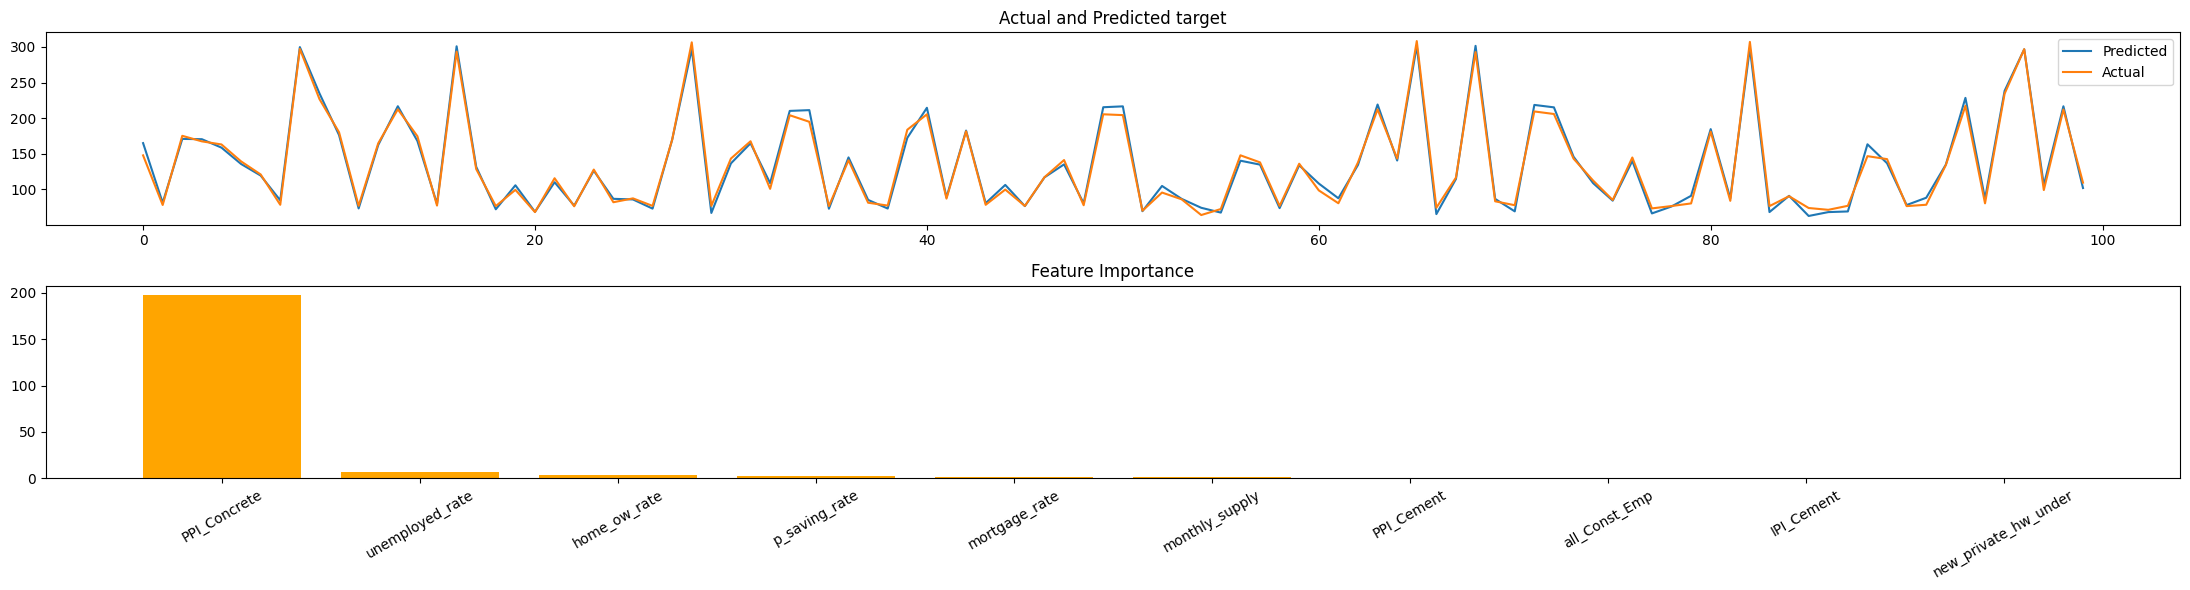

LinearRegression()

In [300]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
analyse_model(regressor, X_train=final_x_traindf, X_test=x_test_df, y_train=y_train, y_test=y_test)

## **Conclusion**

This data science project aimed to investigate the key factors influencing home prices in the United States over the past two decades. By analyzing a comprehensive dataset containing information on various economic, demographic, and housing market indicators, we employed advanced data science techniques, including feature engineering, feature selection, and machine learning, to build a predictive model of home prices.

Our analysis revealed that several factors significantly impacted home prices, including mortgage rates, saving rates, population growth, new housing construction, and economic indicators such as GDP and unemployment rates. The developed linear regression model demonstrated good predictive performance, with an accuracy gain of over 95% compared to a simple baseline model.

These findings provide valuable insights into the complex factors driving home prices in the United States. Understanding these relationships can inform policymakers, economists, and real estate professionals in making informed decisions regarding housing market regulation, economic policies, and individual investment strategies.

The developed model can be further enhanced by incorporating additional data sources, refining the feature engineering process, and exploring alternative machine learning algorithms. Future research could focus on analyzing regional variations in home price determinants and investigating the impact of emerging factors such as technological advancements and climate change on housing affordability.